In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

columns = ['uf', 'cidade', 'zona', 'secao', 'cargo', 'candidato', 'votos']
df = pd.read_csv('./out.txt', sep=';', names=columns)


<BarContainer object of 28 artists>

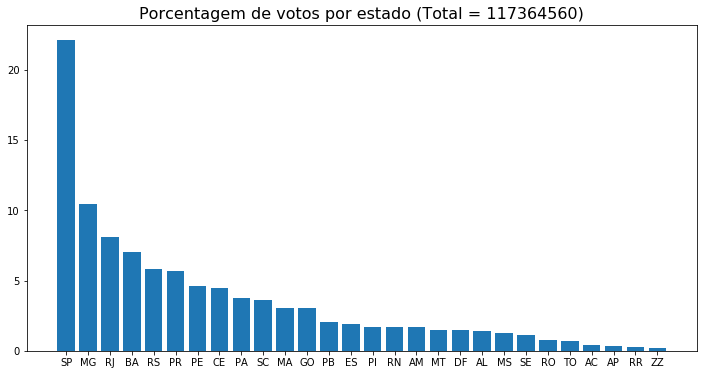

In [18]:
matplotlib.rcParams['figure.figsize'] = [12, 6]
matplotlib.rcParams['axes.titlesize'] = 16

votos_estado = df[df.cargo == 'Presidente'].groupby('uf').sum().sort_values('votos', ascending=False)
total_votos = votos_estado.sum().votos
votos_estado['porcent_votos'] = 100 * votos_estado.votos / total_votos
plt.title("Porcentagem de votos por estado (Total = %s)" % total_votos)
plt.bar(votos_estado.index, votos_estado.porcent_votos)


In [17]:
votos_estado[['votos', 'porcent_votos']]


,votos,porcent_votos
uf,,
SP,25930749,22.094190
MG,12214681,10.407470
RJ,9479580,8.077038
BA,8236847,7.018172
RS,6838548,5.826757
PR,6620465,5.640941
PE,5393186,4.595242
CE,5244712,4.468736
PA,4401798,3.750534


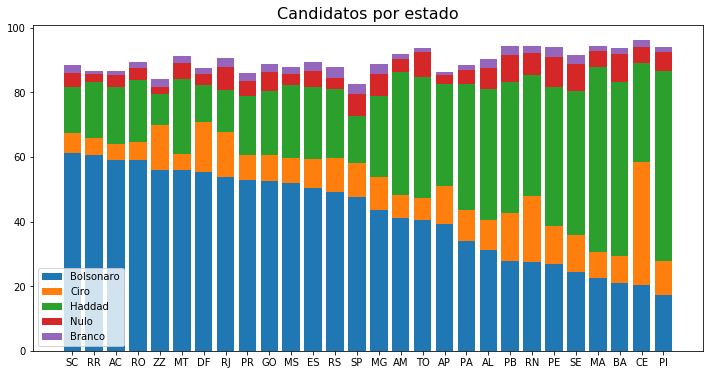

In [64]:
presidente = df[df.cargo == 'Presidente']
t = presidente.groupby('uf').sum()  #.sort_values('votos', ascending=False)
b = presidente[presidente.candidato == 'JAIR BOLSONARO']
h = presidente[presidente.candidato == 'FERNANDO HADDAD']
c = presidente[presidente.candidato == 'CIRO GOMES']
n = presidente[presidente.candidato == 'Nulo']
r = presidente[presidente.candidato == 'Branco']
b, c, h, n, r = [_df.groupby('uf').sum() for _df in [b, c, h, n, r]]
b['bolsonaro'] = b.votos
b['ciro'] = c.votos
b['haddad'] = h.votos
b['nulo'] = n.votos
b['branco'] = r.votos
b['total'] = t.votos
b = b[['bolsonaro', 'ciro', 'haddad', 'nulo', 'branco', 'total']]
for k in ['bolsonaro', 'ciro', 'haddad', 'nulo', 'branco']:
    b['porcent_%s' % k] = 100 * b[k] / b.total
b = b.sort_values('porcent_bolsonaro', ascending=False)
plt.title('Candidatos por estado')
pb = plt.bar(b.index, b.porcent_bolsonaro)
pc = plt.bar(b.index, b.porcent_ciro, bottom = b.porcent_bolsonaro)
ph = plt.bar(b.index, b.porcent_haddad, bottom = b.porcent_bolsonaro+b.porcent_ciro)
pn = plt.bar(b.index, b.porcent_nulo, bottom = b.porcent_bolsonaro+b.porcent_ciro+b.porcent_haddad)
pr = plt.bar(b.index, b.porcent_branco, bottom = b.porcent_bolsonaro+b.porcent_ciro+b.porcent_haddad+b.porcent_nulo)
plt.legend((pb[0], pc[0], ph[0], pn[0], pr[0]), ('Bolsonaro', 'Ciro', 'Haddad', 'Nulo', 'Branco'))

# b